<a href="https://colab.research.google.com/github/aman5898/Data-Science-December/blob/main/2022-1-03-Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.worldometers.info/coronavirus/

In [1]:
html_content = """
  <html>
  <head>
    <title>Scrap</title>
  </head>
  <body>
    <table>
      <thead>
        <tr>
          <td>Alfreds Futterkiste</td>
          <td>Maria Anders</td>
          <td>Germany</td>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td>1 Centro comercial Moctezuma</td>
          <td>1 Francisco Chang</td>
          <td>1 Mexico</td>
        </tr>
        <tr>
          <td>2 Centro comercial Moctezuma</td>
          <td>2 Francisco Chang</td>
          <td>2 Mexico</td>
        </tr>
      </tbody>
    </table>
  </body>
  </html>
"""

html_content2 = """
  <html><head>
    <title>Scrap</title>
  </head>
  <body>
    <div class="content">
      <p class="first p">This is First P tag</p>
      <p class="second p">This is Second P tag</p>
      
      <a href="https://nados.pepcoding.com" id="nados-link">go to nados</a><a href="https://pepcoding.com" id="pepcoding-link">go to pepcoding</a></div><a href="pepcoding.com" id="pepcoding-link">
  
  
          </a></body></html>
"""

In [3]:
!pip install beautifulsoup4

In [4]:
from bs4 import BeautifulSoup

In [5]:
bs = BeautifulSoup(html_content2)

In [8]:
bs

<html><head>
<title>Scrap</title>
</head>
<body>
<div class="content">
<p class="first p">This is First P tag</p>
<p class="second p">This is Second P tag</p>
<a href="https://nados.pepcoding.com" id="nados-link">go to nados</a><a href="https://pepcoding.com" id="pepcoding-link">go to pepcoding</a></div><a href="pepcoding.com" id="pepcoding-link">
</a></body></html>

In [12]:
bs.p

<p class="first p">This is First P tag</p>

In [13]:
bs.find('p')

<p class="first p">This is First P tag</p>

In [15]:
bs.findAll('p')

<p class="second p">This is Second P tag</p>

In [16]:
bs.findAll('a')

[<a href="https://nados.pepcoding.com" id="nados-link">go to nados</a>,
 <a href="https://pepcoding.com" id="pepcoding-link">go to pepcoding</a>,
 <a href="pepcoding.com" id="pepcoding-link">
 </a>]

In [21]:
bs.div.findAll('a')

[<a href="https://nados.pepcoding.com" id="nados-link">go to nados</a>,
 <a href="https://pepcoding.com" id="pepcoding-link">go to pepcoding</a>]

In [27]:
bs.findAll('p', attrs = {'class': 'second'})

[<p class="second p">This is Second P tag</p>]

In [ ]:
from bs4 import BeautifulSoup

In [28]:
bs = BeautifulSoup(html_content)

In [ ]:
heading = bs.thead
heading

In [ ]:
pd_heading = []

for ele in heading.findAll('td'):
  txt = ele.text
  pd_heading.append(txt)

pd_heading

In [ ]:
values = bs.tbody
values

In [48]:
pd_values = []

for tr in values.findAll('tr'):
    row = []
    for td in tr.findAll('td'):
      row.append(td.text)
    
    pd_values.append(row)

pd_values

[['1 Centro comercial Moctezuma', '1 Francisco Chang', '1 Mexico'],
 ['2 Centro comercial Moctezuma', '2 Francisco Chang', '2 Mexico']]

In [50]:
print(pd_heading)
print(pd_values)

['Alfreds Futterkiste', 'Maria Anders', 'Germany']
[['1 Centro comercial Moctezuma', '1 Francisco Chang', '1 Mexico'], ['2 Centro comercial Moctezuma', '2 Francisco Chang', '2 Mexico']]


In [52]:
import pandas as pd

pd.DataFrame(pd_values, columns = pd_heading)

,Alfreds Futterkiste,Maria Anders,Germany
0,1 Centro comercial Moctezuma,1 Francisco Chang,1 Mexico
1,2 Centro comercial Moctezuma,2 Francisco Chang,2 Mexico


In [53]:
import requests

In [58]:
pageContent = requests.get('https://www.worldometers.info/coronavirus/')
pageContent

<Response [200]>

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/appl
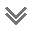

In [60]:
pageContent.content

In [61]:
bs = BeautifulSoup(pageContent.content)

In [67]:
len(bs.findAll('table'))

3

In [68]:
table = bs.table

heading = table.thead
heading

<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>
</thead>

In [82]:
pd_heading = []

for ele in heading.findAll('th'):
  txt = ele.text
  if len(txt) == 0:
    pd_heading.append(None)
  else:
    pd_heading.append(txt)

pd_heading

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop\n',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [ ]:
# values = table.findAll('tbody')[0]
values = table.tbody
values

In [83]:
pd_values = []

for tr in values.findAll('tr'):
    row = []
    for td in tr.findAll('td'):
      if len(td.text) == 0:
        row.append(None)
      else:
        row.append(td.text)
    
    pd_values.append(row)

pd_values

[[None,
  '\nNorth America\n',
  '66,525,119',
  '+1,818',
  '1,246,031',
  '+20',
  '50,353,257',
  '+2,146',
  '14,925,831',
  '24,352',
  None,
  None,
  None,
  None,
  None,
  'North America',
  '\n',
  None,
  None,
  None,
  None,
  None],
 [None,
  '\nAsia\n',
  '84,955,968',
  '+41,165',
  '1,256,971',
  '+379',
  '82,065,081',
  '+51,666',
  '1,633,916',
  '27,633',
  None,
  None,
  None,
  None,
  None,
  'Asia',
  '\n',
  None,
  None,
  None,
  None,
  None],
 [None,
  '\nSouth America\n',
  '39,913,383',
  '+1,278',
  '1,192,447',
  '+11',
  '37,689,601',
  '+2,015',
  '1,031,335',
  '12,904',
  None,
  None,
  None,
  None,
  None,
  'South America',
  '\n',
  None,
  None,
  None,
  None,
  None],
 [None,
  '\nEurope\n',
  '88,929,788',
  '+114,014',
  '1,533,001',
  '+1,492',
  '75,451,034',
  '+145,550',
  '11,945,753',
  '22,303',
  None,
  None,
  None,
  None,
  None,
  'Europe',
  '\n',
  None,
  None,
  None,
  None,
  None],
 [None,
  '\nAfrica\n',
  '9,882,005

In [77]:
len(pd_values)

22

In [91]:
df = pd.DataFrame(pd_values, columns = pd_heading)

In [97]:
df.head(12)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,None,\nNorth America\n,"66,525,119","+1,818","1,246,031",+20,"50,353,257","+2,146","14,925,831","24,352",None,None,None,None,None,North America,\n,None,None,None,None,None
1,None,\nAsia\n,"84,955,968","+41,165","1,256,971",+379,"82,065,081","+51,666","1,633,916","27,633",None,None,None,None,None,Asia,\n,None,None,None,None,None
2,None,\nSouth America\n,"39,913,383","+1,278","1,192,447",+11,"37,689,601","+2,015","1,031,335","12,904",None,None,None,None,None,South America,\n,None,None,None,None,None
3,None,\nEurope\n,"88,929,788","+114,014","1,533,001","+1,492","75,451,034","+145,550","11,945,753","22,303",None,None,None,None,None,Europe,\n,None,None,None,None,None
4,None,\nAfrica\n,"9,882,005","+7,336","229,412",+49,"8,750,101","+7,075","902,492","2,210",None,None,None,None,None,Africa,\n,None,None,None,None,None
5,None,\nOceania\n,"665,237","+37,349","4,534",+9,"418,206",+86,"242,497",205,None,None,None,None,None,Australia/Oceania,\n,None,None,None,None,None
6,None,\n\n,721,None,15,None,706,None,0,0,None,None,None,None,None,None,\n,None,None,None,None,None
7,None,World,"290,872,221","+202,960","5,462,411","+1,960","254,727,986","+208,538","30,681,824","89,607","37,316",700.8,None,None,None,All,\n,None,None,None,None,None
8,1,USA,"56,142,175",None,"847,408",None,"41,543,060",None,"13,751,707","18,609","168,131","2,538","813,825,574","2,437,195","333,918,903",North America,6,394,0,None,None,"41,183"
9,2,India,"34,922,882",None,"481,893",None,"34,295,407","+10,846","145,582","8,944","24,938",344,"680,950,476","486,260","1,400,383,713",Asia,40,"2,906",2,None,None,104


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    224 non-null    object
 1   Country,Other        232 non-null    object
 2   TotalCases           232 non-null    object
 3   NewCases             87 non-null     object
 4   TotalDeaths          232 non-null    object
 5   NewDeaths            62 non-null     object
 6   TotalRecovered       232 non-null    object
 7   NewRecovered         85 non-null     object
 8   ActiveCases          232 non-null    object
 9   Serious,Critical     165 non-null    object
 10  Tot Cases/1M pop     223 non-null    object
 11  Deaths/1M pop        212 non-null    object
 12  TotalTests           209 non-null    object
 13  Tests/
1M pop
       209 non-null    object
 14  Population           224 non-null    object
 15  Continent            229 non-null    object
 16  1 Caseev

In [89]:
df.isna()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,True,True
1,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,True,True
2,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,True,True
3,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,True,True
4,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False,False,False,True,True,True,True,True
228,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False,False,False,True,True,True,True,True
229,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False,False,False,True,True,True,True,True
230,False,False,False,True,False,True,False,True,False,True,False,True,True,True,False,False,False,True,True,True,True,True


In [90]:
df.isna().sum()

#                        8
Country,Other            0
TotalCases               0
NewCases               145
TotalDeaths              0
NewDeaths              170
TotalRecovered           0
NewRecovered           147
ActiveCases              0
Serious,Critical        67
Tot Cases/1M pop         9
Deaths/1M pop           20
TotalTests              23
Tests/\n1M pop\n        23
Population               8
Continent                3
1 Caseevery X ppl        2
1 Deathevery X ppl      21
1 Testevery X ppl       23
New Cases/1M pop       152
New Deaths/1M pop      177
Active Cases/1M pop     18
dtype: int64

https://tdwi.org/articles/2016/11/15/beer-and-diapers-impossible-correlation.aspx 

https://www.youtube.com/watch?v=WXuK6gekU1Y

